# MULTIVARIABLE LINEAR REGRESSION

In [1]:
#Call the import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#call the Data

c_df=pd.read_csv(r"E:\New folder\Corona_unofficial.csv")
c_df.head()

,Unnamed: 0,case_in_country,reporting date,location,country,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,...,Chills,Body_Pain,difficut_to_breath,Running_nose,Cold,Abdomain_pain,Vomiting,Sore_throat,Malaise,death
0,0,0,20-01-2020,"Shenzhen, Guangdong",China,male,66,11-01-2020,1,0.0,...,0,1,0,0,1,0,1,0,1,0
1,1,0,20-01-2020,Shanghai,China,female,56,15-01-2020,0,1.0,...,1,0,0,1,0,0,1,1,1,0
2,2,0,21-01-2020,Zhejiang,China,male,46,17-01-2020,0,1.0,...,1,1,1,1,1,0,1,1,0,1
3,3,0,21-01-2020,Tianjin,China,female,60,19-01-2020,1,0.0,...,0,0,1,0,0,1,0,1,0,0
4,4,0,21-01-2020,Tianjin,China,male,58,14-01-2020,0,0.0,...,1,0,1,0,1,1,1,0,0,0


In [3]:
#showing all the information

c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 22 columns):
Unnamed: 0            1085 non-null int64
case_in_country       1085 non-null int64
reporting date        1085 non-null object
location              1085 non-null object
country               1085 non-null object
gender                1085 non-null object
age                   1085 non-null int64
hosp_visit_date       507 non-null object
visiting Wuhan        1085 non-null int64
from Wuhan            1081 non-null float64
Feaver                1085 non-null int64
Cough                 1085 non-null int64
Chills                1085 non-null int64
Body_Pain             1085 non-null int64
difficut_to_breath    1085 non-null int64
Running_nose          1085 non-null int64
Cold                  1085 non-null int64
Abdomain_pain         1085 non-null int64
Vomiting              1085 non-null int64
Sore_throat           1085 non-null int64
Malaise               1085 non-null int64
death

In [4]:
#Counting number of null values they Include

c_df.isnull().sum()

Unnamed: 0              0
case_in_country         0
reporting date          0
location                0
country                 0
gender                  0
age                     0
hosp_visit_date       578
visiting Wuhan          0
from Wuhan              4
Feaver                  0
Cough                   0
Chills                  0
Body_Pain               0
difficut_to_breath      0
Running_nose            0
Cold                    0
Abdomain_pain           0
Vomiting                0
Sore_throat             0
Malaise                 0
death                   0
dtype: int64

## Data Wrangling

### If the value of the string is important, we can't use it directly. To use that we have to create dummy variable of that column by get_dummies method

#### We will do 3 steps to use that data in our advantage

##### 1.) Create a dummy variable of important columns
##### 2.) Conctenate that with our data set  
##### 3.) Then drop that column from which we created dummy variables & the last column of that dummy variable columns to avoid dummy variable trap 

In [5]:
# 1.) Create a dummy variable of important columns

dummies_loc=pd.get_dummies(c_df.location)
dummies_loc

,Afghanistan,Aichi Prefecture,Alappuzha,Algeria,Amiens,Andalusia,Annecy,Araq,Arizona,Baden-Wuerttemberg,...,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang,Zhuhai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 2.) Conctenate that with our data set

corona_data=pd.concat([c_df,dummies_loc],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,location,country,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,...,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang,Zhuhai
0,0,0,20-01-2020,"Shenzhen, Guangdong",China,male,66,11-01-2020,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,20-01-2020,Shanghai,China,female,56,15-01-2020,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,21-01-2020,Zhejiang,China,male,46,17-01-2020,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,21-01-2020,Tianjin,China,female,60,19-01-2020,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,21-01-2020,Tianjin,China,male,58,14-01-2020,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Innsbruck,Austria,Not-specify,24,NaN,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,Afghanistan,Afghanistan,Not-specify,35,NaN,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,Algeria,Algeria,male,49,NaN,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,1,25-02-2020,Croatia,Croatia,male,49,NaN,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 3.) Then drop that column from which we created dummy variables & the last column of that dummy variable
#     columns to avoid dummy variable trap

corona_data=corona_data.drop(['location','Zhuhai'],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,country,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,...,Washington,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang
0,0,0,20-01-2020,China,male,66,11-01-2020,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,20-01-2020,China,female,56,15-01-2020,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,21-01-2020,China,male,46,17-01-2020,0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,21-01-2020,China,female,60,19-01-2020,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,21-01-2020,China,male,58,14-01-2020,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Austria,Not-specify,24,NaN,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,Afghanistan,Not-specify,35,NaN,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,Algeria,male,49,NaN,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,1,25-02-2020,Croatia,male,49,NaN,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 1.) Create a dummy variable of important columns

dummies_country=pd.get_dummies(c_df.country)
dummies_country

,Afghanistan,Algeria,Australia,Austria,Bahrain,Belgium,Cambodia,Canada,China,Croatia,...,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,Vietnam
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 2.) Conctenate that with our data set

corona_data=pd.concat([corona_data,dummies_country],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,country,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,...,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,Vietnam
0,0,0,20-01-2020,China,male,66,11-01-2020,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,20-01-2020,China,female,56,15-01-2020,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,21-01-2020,China,male,46,17-01-2020,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,21-01-2020,China,female,60,19-01-2020,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,21-01-2020,China,male,58,14-01-2020,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Austria,Not-specify,24,NaN,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,Afghanistan,Not-specify,35,NaN,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,Algeria,male,49,NaN,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,1,25-02-2020,Croatia,male,49,NaN,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 3.) Then drop that column from which we created dummy variables & the last column of that dummy variable
#     columns to avoid dummy variable trap

corona_data=corona_data.drop(['country','Vietnam'],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,Cough,...,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA
0,0,0,20-01-2020,male,66,11-01-2020,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,20-01-2020,female,56,15-01-2020,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,21-01-2020,male,46,17-01-2020,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,21-01-2020,female,60,19-01-2020,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,21-01-2020,male,58,14-01-2020,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Not-specify,24,NaN,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,Not-specify,35,NaN,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,male,49,NaN,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,1,25-02-2020,male,49,NaN,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 1.) Create a dummy variable of important columns

dummies_gender=pd.get_dummies(c_df.gender)
dummies_gender

,Not-specify,female,male
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
1080,1,0,0
1081,1,0,0
1082,0,0,1
1083,0,0,1


In [12]:
# 2.) Conctenate that with our data set

corona_data=pd.concat([corona_data,dummies_gender],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,gender,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,Cough,...,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,Not-specify,female,male
0,0,0,20-01-2020,male,66,11-01-2020,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,20-01-2020,female,56,15-01-2020,0,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,21-01-2020,male,46,17-01-2020,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,21-01-2020,female,60,19-01-2020,1,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,21-01-2020,male,58,14-01-2020,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Not-specify,24,NaN,0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1081,1081,1,24-02-2020,Not-specify,35,NaN,0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1082,1082,1,26-02-2020,male,49,NaN,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1083,1083,1,25-02-2020,male,49,NaN,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# 3.) Then drop that column from which we created dummy variables & the last column of that dummy variable
#     columns to avoid dummy variable trap

corona_data=corona_data.drop(['gender','Not-specify'],axis=1)
corona_data

,Unnamed: 0,case_in_country,reporting date,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,Cough,Chills,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,female,male
0,0,0,20-01-2020,66,11-01-2020,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,20-01-2020,56,15-01-2020,0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,0,21-01-2020,46,17-01-2020,0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,0,21-01-2020,60,19-01-2020,1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,21-01-2020,58,14-01-2020,0,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,24,NaN,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,35,NaN,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,49,NaN,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1083,1083,1,25-02-2020,49,NaN,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Replacing index with reporting date

corona_data=corona_data.set_index("reporting date")
corona_data

,Unnamed: 0,case_in_country,age,hosp_visit_date,visiting Wuhan,from Wuhan,Feaver,Cough,Chills,Body_Pain,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,female,male
reporting date,,,,,,,,,,,,,,,,,,,,,
20-01-2020,0,0,66,11-01-2020,1,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20-01-2020,1,0,56,15-01-2020,0,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
21-01-2020,2,0,46,17-01-2020,0,1.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
21-01-2020,3,0,60,19-01-2020,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21-01-2020,4,0,58,14-01-2020,0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-02-2020,1080,2,24,NaN,0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24-02-2020,1081,1,35,NaN,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26-02-2020,1082,1,49,NaN,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Deleting unwanted columns

corona_data=corona_data.drop(['hosp_visit_date','visiting Wuhan','from Wuhan'],axis=1)
corona_data

,Unnamed: 0,case_in_country,age,Feaver,Cough,Chills,Body_Pain,difficut_to_breath,Running_nose,Cold,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UAE,UK,USA,female,male
reporting date,,,,,,,,,,,,,,,,,,,,,
20-01-2020,0,0,66,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20-01-2020,1,0,56,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
21-01-2020,2,0,46,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
21-01-2020,3,0,60,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21-01-2020,4,0,58,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-02-2020,1080,2,24,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
24-02-2020,1081,1,35,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
26-02-2020,1082,1,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Seperating Independent & Dependent variable

X=corona_data.drop(['death'],axis=1)
y=corona_data['death']

In [17]:
# Calling LinearRegression & creating a model

from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [18]:
#Traning that model

model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# This are m in y=m*x+c i.e Co-efficient

model1.coef_

array([-1.78353495e-04,  3.27590733e-04, -6.16209630e-04,  1.86854419e-03,
        6.96720629e-03,  1.39875741e-02,  6.02480354e-02,  8.63267754e-03,
        7.62115033e-03, -4.95165190e-03,  2.91500816e-04,  8.25701819e-03,
        2.03387422e-02, -1.45560264e-02,  5.45053491e+09,  7.48224240e+08,
       -1.93189826e+08, -6.85290102e+07,  7.63533688e+08, -6.82565144e+08,
        7.63533688e+08, -1.87495053e+09,  4.73181305e+08,  1.09167456e+09,
        4.15652371e+09, -6.82565143e+08,  1.09167456e+09, -1.20911670e+08,
        7.64621070e+08, -8.77115118e+08,  7.63533688e+08,  7.63533688e+08,
        7.63533687e+08,  4.73181304e+08, -6.82565143e+08, -6.82565143e+08,
       -6.82565144e+08,  7.48224240e+08, -1.20911669e+08,  2.10716157e+08,
        7.63533688e+08, -1.28024309e+08, -4.06393385e-03,  7.63533688e+08,
        1.09167456e+09, -1.20911670e+08,  7.48224240e+08, -1.20911670e+08,
        7.48224240e+08, -1.20911670e+08, -1.87495053e+09, -1.20911670e+08,
        1.09167455e+09,  

In [20]:
# This are c in y=m*x+c

model1.intercept_

0.4251844306557958

#### By inserting values of x i.e independent-variable we will get the output that the person will die or not ( 0 = Not-Die , 1 = Die) but there are multipal values so i am skipping that step 

# LOGISTIC REGRESSION

In [21]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 20-01-2020 to 25-02-2020
Columns: 208 entries, Unnamed: 0 to male
dtypes: int64(15), uint8(193)
memory usage: 340.1+ KB


#### Analyzing our Data

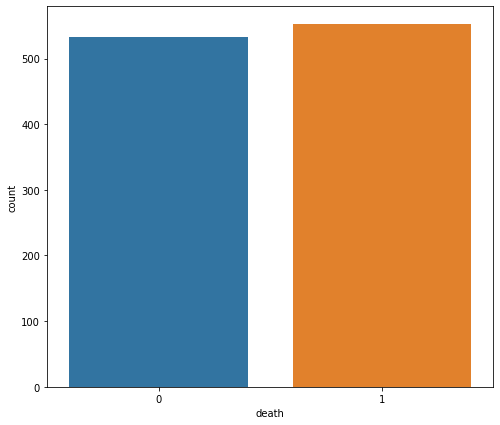

In [22]:
# Comparing number of deaths 0 = Not-dead & 1 = Dead

plt.figure(figsize=(8,7))
sns.countplot(data=corona_data,x="death")

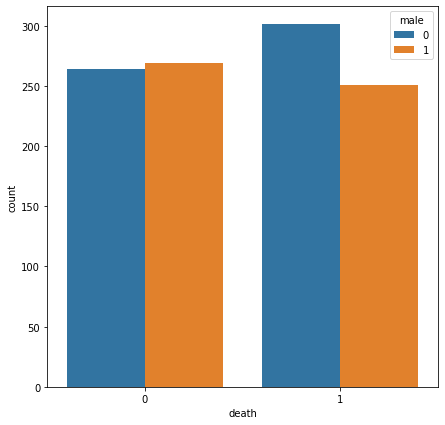

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(x="death",hue="male",data=corona_data)

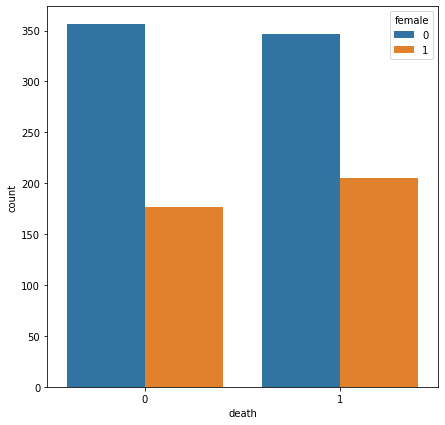

In [24]:
plt.figure(figsize=(7,7))
sns.countplot(x="death",hue="female",data=corona_data)

#### Test & Train our model

In [25]:
# Traning our model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
#creating a LogisticRegression model & training it with fit

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#model Score

model.score(X,y)

0.647926267281106

In [28]:
# What our model predicted

pred=model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [29]:
from sklearn.metrics import classification_report
val=classification_report(y_test,pred)
val

'              precision    recall  f1-score   support\n\n           0       0.64      0.64      0.64        98\n           1       0.71      0.71      0.71       119\n\n    accuracy                           0.68       217\n   macro avg       0.67      0.67      0.67       217\nweighted avg       0.68      0.68      0.68       217\n'

In [30]:
# Value counts of our traning set

y_test.value_counts()

1    119
0     98
Name: death, dtype: int64

In [31]:
# This is confusion matrix. I'll expailn this in our next blog post

from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[63 35]
 [35 84]]


In [32]:
print(metrics.recall_score(y_test,pred))

0.7058823529411765


#### Check Accuracy

In [33]:
# Testing Accuracy of our model

from sklearn.metrics import accuracy_score
val2=accuracy_score(y_test,pred)
val2

0.6774193548387096